In [88]:
import numpy as np
import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# IMPORT DATA SET PYTHON ENVIRONMENT

In [89]:
a=pd.read_csv('trainn.csv')

In [90]:
a


,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13989,PLID_10956,Viva Stepney,20,M,Uruguay,6'0,161lbs,60.0,48.0,62.0,...,Right,6.0,NaN,7.6,2.0,Medium,Academy,6.0,0.0,1
13990,PLID_17290,Illa Pitre,18,F,England,5'10,165lbs,53.0,68.0,59.0,...,Right,5.3,0.0,5.6,3.0,Medium,Academy,4.0,0.0,0
13991,PLID_5193,Marylouise Mosley,17,M,Japan,6'0,172lbs,56.0,73.0,62.0,...,Left,5.7,0.0,7.7,3.0,Low,Talent Hunt,2.0,0.0,1
13992,PLID_12173,Teri Escamilla,20,F,Ukraine,5'10,150lbs,71.0,69.0,70.0,...,Left,6.8,1.0,5.8,4.0,Medium,Academy,6.0,0.0,1


In [91]:
a.dtypes



player_id                     object
name                          object
age                            int64
gender                        object
country                       object
height                        object
weight                        object
ball_controlling_skills      float64
body_reflexes                float64
body_balance                 float64
jumping_skills               float64
penalties_conversion_rate    float64
mental_strength              float64
goalkeeping_skills           float64
defending_skills             float64
passing_skills               float64
dribbling_skills             float64
shot_accuracy                float64
body_strength_stamina        float64
max_running_speed            float64
strong_foot                   object
behaviour_rating             float64
matches_played               float64
fitness_rating               float64
trophies_won                 float64
dedication_level              object
coaching                      object
y

In [92]:
#change data type
a["height"] = a["height"].apply(lambda x: int(x.split("'")[0]) * 12 + int(x.split("'")[1]))
a["weight"] = a["weight"].str.extract("(\d+)").astype(float)

In [93]:
a.dtypes


player_id                     object
name                          object
age                            int64
gender                        object
country                       object
height                         int64
weight                       float64
ball_controlling_skills      float64
body_reflexes                float64
body_balance                 float64
jumping_skills               float64
penalties_conversion_rate    float64
mental_strength              float64
goalkeeping_skills           float64
defending_skills             float64
passing_skills               float64
dribbling_skills             float64
shot_accuracy                float64
body_strength_stamina        float64
max_running_speed            float64
strong_foot                   object
behaviour_rating             float64
matches_played               float64
fitness_rating               float64
trophies_won                 float64
dedication_level              object
coaching                      object
y

# EXPLORATORY DATA ANALYSIS

For the analysis of our cleaned dataset, we will employ various visualizations to study patterns and derive inferences.

In [94]:

a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13975 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  int64  
 6   weight                     13577 non-null  float64
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

In [95]:
#statistical info about the data
a.describe()

,age,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,...,shot_accuracy,body_strength_stamina,max_running_speed,behaviour_rating,matches_played,fitness_rating,trophies_won,years_of_experience,no_of_disqualifications,selection
count,13994.000000,13994.000000,13577.000000,13581.000000,13994.000000,13994.000000,13970.000000,13964.000000,13966.000000,13994.000000,...,13422.000000,13994.000000,13994.000000,13291.000000,13328.000000,13299.000000,13994.000000,13850.000000,13994.000000,13994.000000
mean,21.135844,71.590467,165.621492,56.043958,61.934329,62.753323,63.612026,48.495703,56.768366,16.474632,...,47.178140,62.652780,23.586094,5.822068,3.908463,6.405482,3.389095,6.434152,-4.740675,0.557525
std,5.162719,18.190359,15.449959,16.787353,14.931963,14.203638,11.938712,15.767506,11.977744,16.874551,...,15.803991,11.512526,5.194387,1.095702,13.583229,1.706983,1.709152,4.450954,72.023656,0.496698
min,16.000000,17.000000,110.000000,5.000000,12.000000,9.000000,14.000000,7.000000,9.000000,1.000000,...,7.000000,15.000000,5.400000,2.100000,0.000000,1.000000,0.000000,1.000000,-999.000000,0.000000
25%,17.000000,69.000000,154.000000,51.000000,54.000000,55.000000,57.000000,39.000000,49.000000,10.000000,...,38.000000,56.000000,21.100000,5.100000,0.000000,5.600000,2.000000,2.000000,0.000000,0.000000
50%,20.000000,71.000000,165.000000,61.000000,64.000000,65.000000,64.000000,49.000000,58.000000,11.000000,...,50.000000,64.000000,24.600000,5.900000,0.000000,6.800000,3.000000,6.000000,0.000000,1.000000
75%,24.000000,73.000000,176.000000,67.000000,72.000000,73.000000,72.000000,60.000000,65.000000,12.000000,...,59.000000,71.000000,27.100000,6.500000,1.000000,7.500000,5.000000,10.000000,0.000000,1.000000
max,61.000000,1188.000000,243.000000,95.000000,96.000000,97.000000,95.000000,92.000000,92.000000,88.000000,...,86.000000,92.000000,35.000000,9.800000,151.000000,10.000000,9.000000,26.000000,25.000000,1.000000


In [96]:
#Checking null values

a.isnull().sum()

player_id                      0
name                           0
age                            0
gender                        19
country                        0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                     125
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int

In [97]:
#Filling null values

a['gender'].fillna("No Gender", inplace = True) 
a['weight'] = a['weight'].fillna(a['weight'].mean())

In [98]:
#Checking again null values 
a.isnull().sum()

player_id                      0
name                           0
age                            0
gender                         0
country                        0
height                         0
weight                         0
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                     125
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int

In [99]:
#Dropping unwanted columns#

a.drop('player_id', axis=1, inplace=True)

In [100]:
a.drop('name', axis=1, inplace=True)


In [124]:
a.drop('country', axis=1, inplace=True)

In [101]:

a.isna().sum().value_counts()

0      17
413     1
24      1
30      1
28      1
572     1
552     1
703     1
666     1
695     1
125     1
144     1
dtype: int64

In [102]:

a.shape

(13994, 28)

In [103]:
# view the first 5 rows of data

a.head(5)

,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,23,M,Ukraine,74,176.0,77.0,58.0,47.0,59.0,41.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,18,M,Russia,70,148.0,54.0,69.0,70.0,62.0,53.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,16,F,Spain,74,172.0,34.0,43.0,45.0,69.0,49.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,27,M,Chile,71,165.0,79.0,73.0,76.0,86.0,81.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,19,F,Argentina,68,158.0,47.0,61.0,74.0,57.0,49.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


In [104]:
# view the last 5 rows of data
a.tail()

,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
13989,20,M,Uruguay,72,161.0,60.0,48.0,62.0,60.0,40.0,...,Right,6.0,NaN,7.6,2.0,Medium,Academy,6.0,0.0,1
13990,18,F,England,70,165.0,53.0,68.0,59.0,73.0,24.0,...,Right,5.3,0.0,5.6,3.0,Medium,Academy,4.0,0.0,0
13991,17,M,Japan,72,172.0,56.0,73.0,62.0,50.0,47.0,...,Left,5.7,0.0,7.7,3.0,Low,Talent Hunt,2.0,0.0,1
13992,20,F,Ukraine,70,150.0,71.0,69.0,70.0,51.0,56.0,...,Left,6.8,1.0,5.8,4.0,Medium,Academy,6.0,0.0,1
13993,16,F,Chile,68,159.0,53.0,59.0,67.0,54.0,62.0,...,Right,4.2,0.0,6.7,0.0,Medium,Source,1.0,0.0,0


In [105]:
#view the shape of data

print("Number of rows", a.shape[0])
print("Number of columns", a.shape[1])

Number of rows 13994
Number of columns 28


In [106]:
#view the features

print("Data Features:\n",a.columns.values)


Data Features:
 ['age' 'gender' 'country' 'height' 'weight' 'ball_controlling_skills'
 'body_reflexes' 'body_balance' 'jumping_skills'
 'penalties_conversion_rate' 'mental_strength' 'goalkeeping_skills'
 'defending_skills' 'passing_skills' 'dribbling_skills' 'shot_accuracy'
 'body_strength_stamina' 'max_running_speed' 'strong_foot'
 'behaviour_rating' 'matches_played' 'fitness_rating' 'trophies_won'
 'dedication_level' 'coaching' 'years_of_experience'
 'no_of_disqualifications' 'selection']


In [107]:
#number of unique values for each feature

print(a.nunique())

age                           39
gender                         3
country                      163
height                        31
weight                        89
ball_controlling_skills       89
body_reflexes                 84
body_balance                  86
jumping_skills                74
penalties_conversion_rate     86
mental_strength               83
goalkeeping_skills            65
defending_skills              78
passing_skills                77
dribbling_skills              48
shot_accuracy                 79
body_strength_stamina         73
max_running_speed            166
strong_foot                    4
behaviour_rating              64
matches_played                18
fitness_rating                85
trophies_won                  10
dedication_level               3
coaching                       4
years_of_experience           25
no_of_disqualifications       17
selection                      2
dtype: int64


# DATA VISUALIZATION

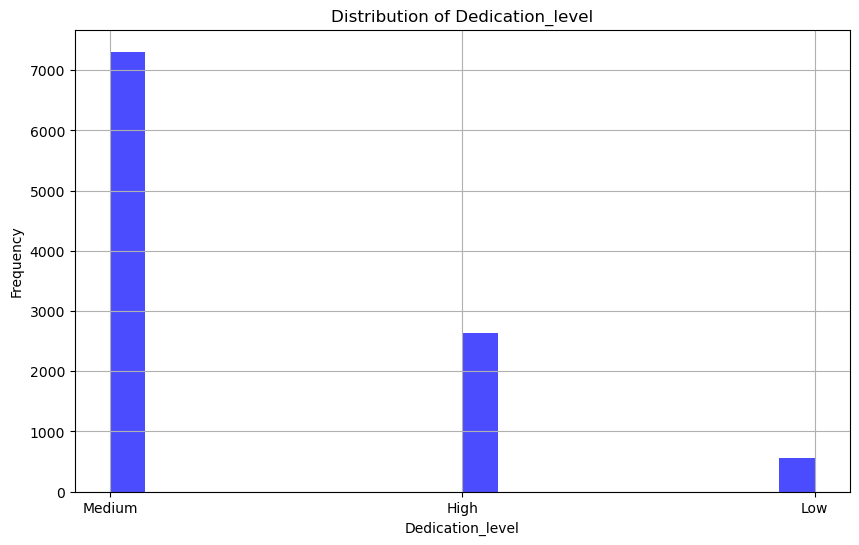

In [153]:
# Create a histogram for the 'dedication_level ' column
plt.figure(figsize=(10, 6))
plt.hist(a['dedication_level'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Dedication_level')
plt.xlabel('Dedication_level')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

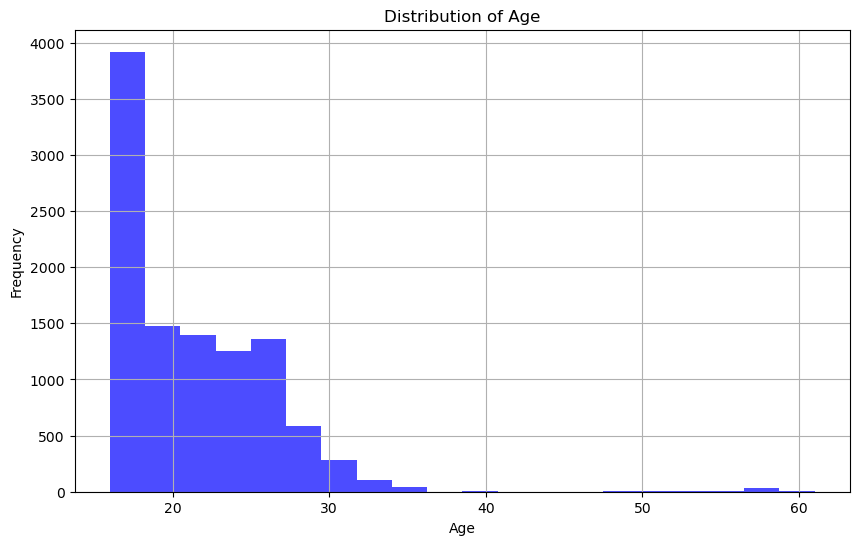

In [128]:
# Create a histogram for the 'age' column
plt.figure(figsize=(10, 6))
plt.hist(a['age'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

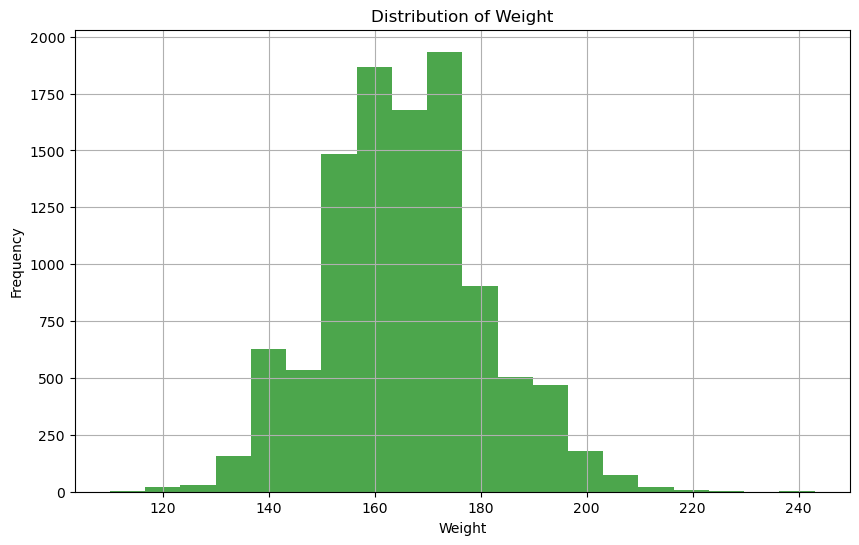

In [130]:
# Create a histogram for the 'weight' column
plt.figure(figsize=(10, 6))
plt.hist(a['weight'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

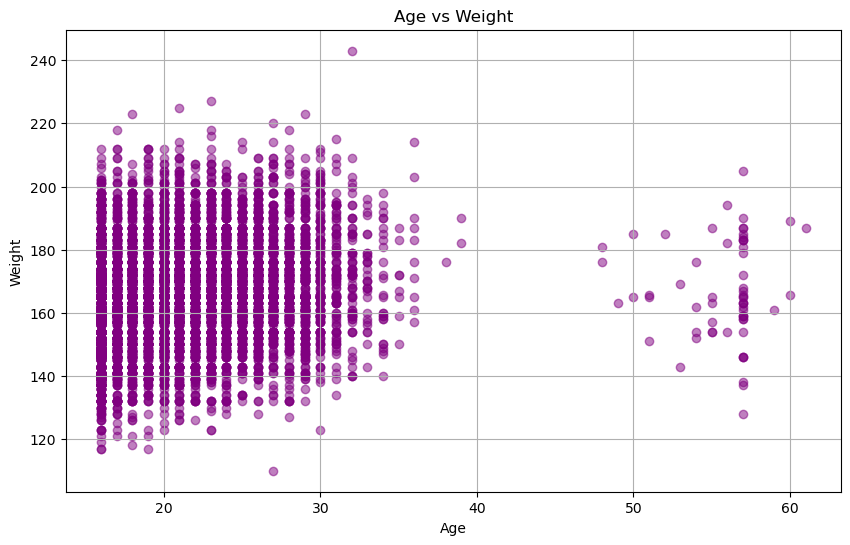

In [131]:
# Create a scatter plot for 'age' vs 'weight'
plt.figure(figsize=(10, 6))
plt.scatter(a['age'], a['weight'], color='purple', alpha=0.5)
plt.title('Age vs Weight')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.grid(True)
plt.show()

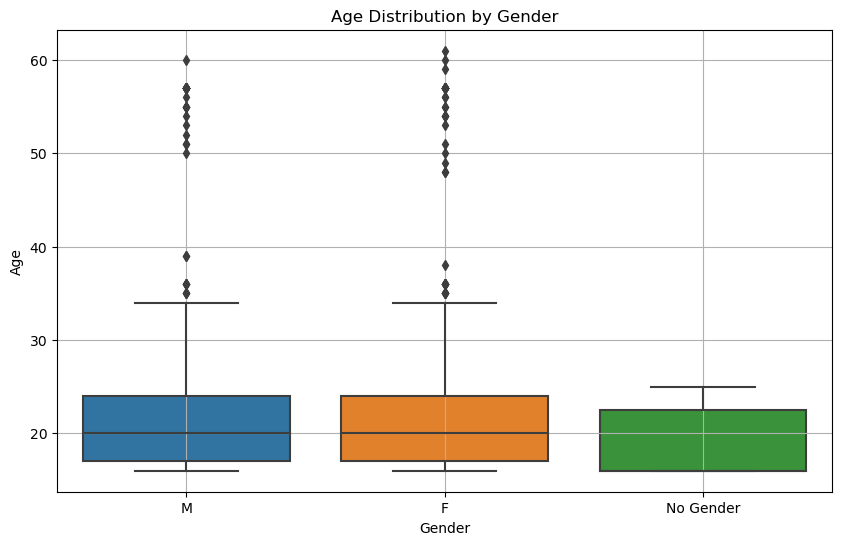

In [133]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='age', data=a)
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.grid(True)
plt.show()

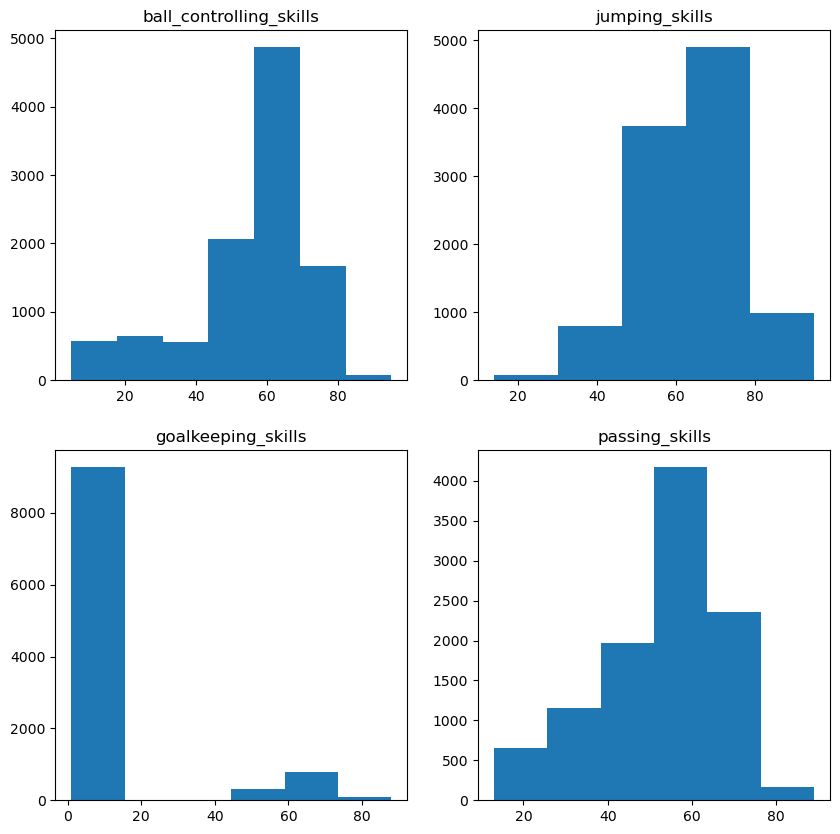

In [142]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
 
axes[0,0].set_title("ball_controlling_skills")
axes[0,0].hist(a['ball_controlling_skills'], bins=7)
 
axes[0,1].set_title("jumping_skills")
axes[0,1].hist(a['jumping_skills'], bins=5);
 
axes[1,0].set_title("goalkeeping_skills")
axes[1,0].hist(a['goalkeeping_skills'], bins=6);
 
axes[1,1].set_title("passing_skills")
axes[1,1].hist(a['passing_skills'], bins=6);

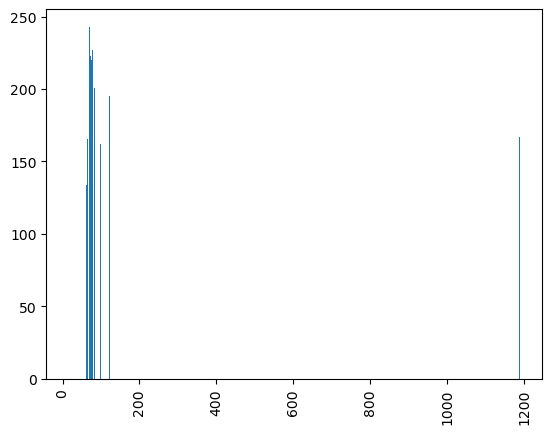

In [108]:
plt.bar(a['height'],a['weight'])
plt.xticks(rotation=90)
plt.show()

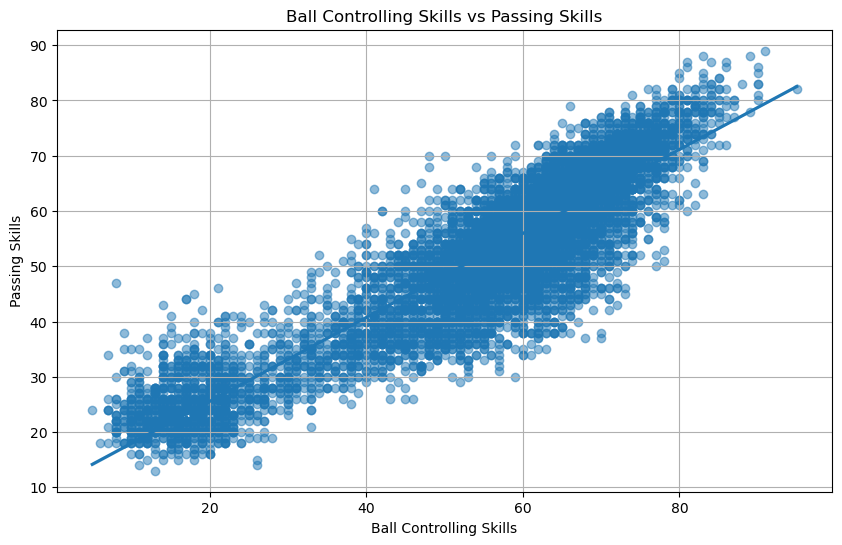

In [134]:
plt.figure(figsize=(10, 6))
sns.regplot(x='ball_controlling_skills', y='passing_skills', data=a, scatter_kws={'alpha':0.5})
plt.title('Ball Controlling Skills vs Passing Skills')
plt.xlabel('Ball Controlling Skills')
plt.ylabel('Passing Skills')
plt.grid(True)
plt.show()

# Correlation

A correlation heatmap displays the correlation coefficients between different numeric variables in your dataset. It helps you understand the strength and direction of linear relationships between variables:

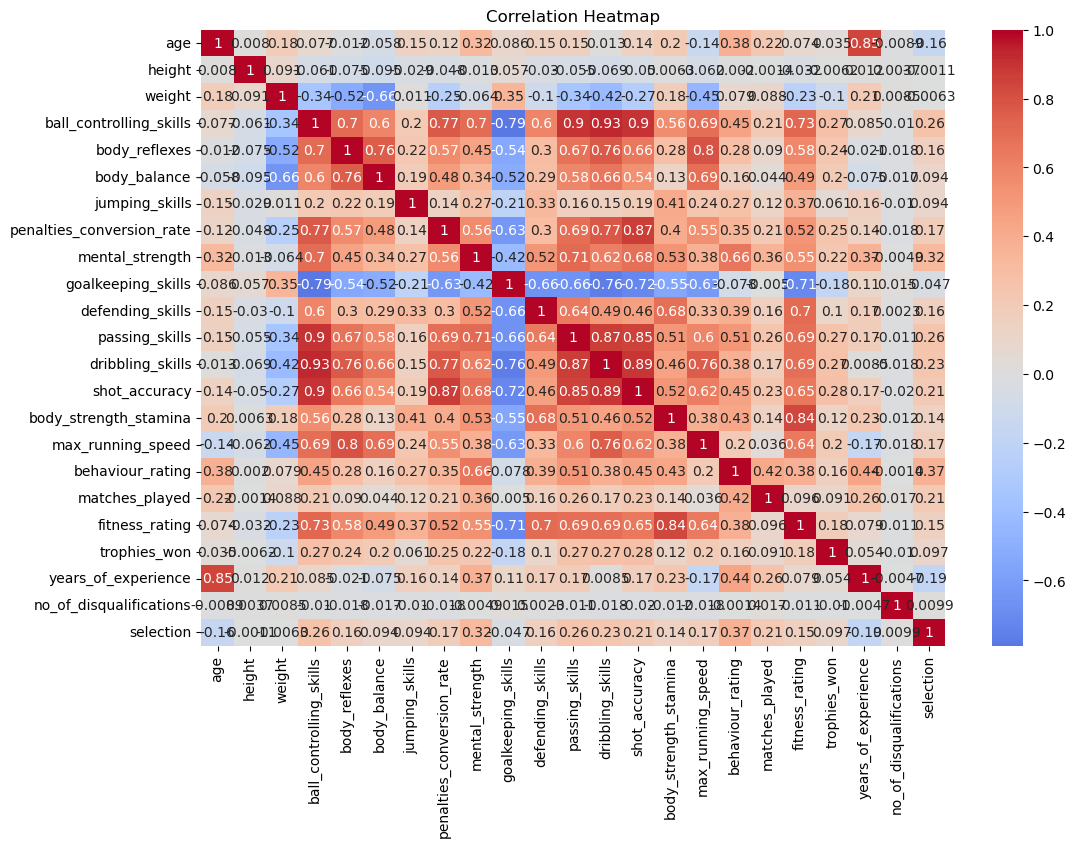

In [135]:
correlation_matrix = a.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

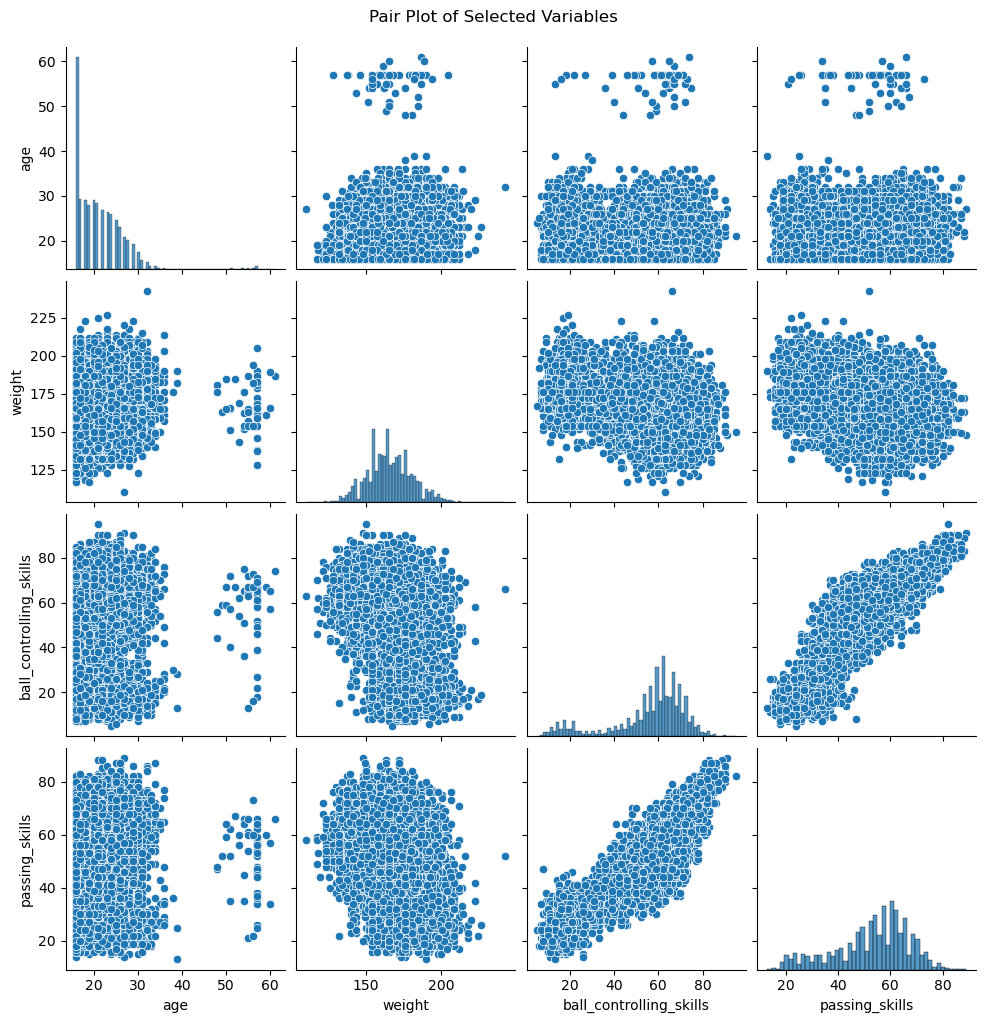

In [137]:
sns.pairplot(a[['age', 'weight', 'ball_controlling_skills', 'passing_skills']])
plt.suptitle('Pair Plot of Selected Variables', y=1.02)
plt.show()





# HANDLING OUTLIERS

An Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects. They can be caused by measurement or execution errors. The analysis for outlier detection is referred to as outlier mining. There are many ways to detect the outliers, and the removal process is the data frame same as removing a data item from the panda’s dataframe.



<AxesSubplot:xlabel='weight'>

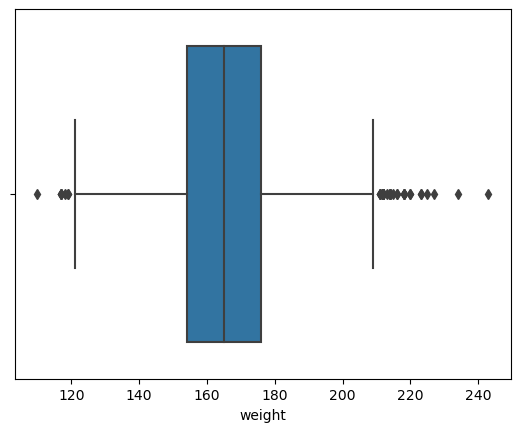

In [109]:

sns.boxplot(x='weight', data=a)

In the above graph, the values above 200 and below 120 are acting as outliers.

<AxesSubplot:xlabel='height'>

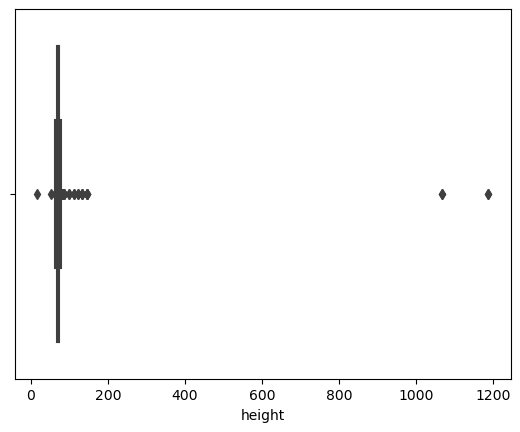

In [110]:
sns.boxplot(x='height', data=a)

# Removing Outliers

For removing the outlier, one must follow the same process of removing an entry from the dataset using its exact position in the dataset because in all the above methods of detecting the outliers end result is the list of all those data items that satisfy the outlier definition according to the method used.

In [111]:
upper_limit = a['weight'].quantile(0.75)
lower_limit = a['weight'].quantile(0.25)
print(upper_limit)
print(lower_limit)

176.0
154.0


<AxesSubplot:xlabel='weight'>

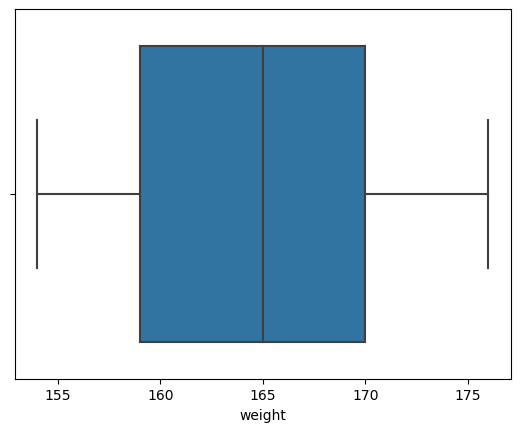

In [112]:
new_a = a[(a['weight'] <= 176.0) & (a['weight'] >=154)]
sns.boxplot(x='weight', data=new_a)

# LABEL ENCODING

In [113]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
a['selection'] = le.fit_transform(a['selection'])
a.head()
     

,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,23,M,Ukraine,74,176.0,77.0,58.0,47.0,59.0,41.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,18,M,Russia,70,148.0,54.0,69.0,70.0,62.0,53.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,16,F,Spain,74,172.0,34.0,43.0,45.0,69.0,49.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,27,M,Chile,71,165.0,79.0,73.0,76.0,86.0,81.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,19,F,Argentina,68,158.0,47.0,61.0,74.0,57.0,49.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


# Split the Data Into Train and Test Datasets

In [165]:
from sklearn import neighbors
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
a=a.dropna()
x = a.drop('selection', axis=1)
y = a['selection']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75)
x_train.shape
print('x_train.shape')
print(x_train.shape)
x_test.shape
print('x_test.shape')
print(x_test.shape)
y_train.shape
print('y_train.shape')
print(y_train.shape)
y_test.shape
print('y_test.shape')
print(y_test.shape)

x_train.shape
(7866, 22)
x_test.shape
(2622, 22)
y_train.shape
(7866,)
y_test.shape
(2622,)


In [ ]:
a.drop('gender', axis=1, inplace=True)
a.drop('strong_foot', axis=1, inplace=True)
a.drop('dedication_level', axis=1, inplace=True)
a.drop('coaching', axis=1, inplace=True)



# Create the Model (Classification)

#Logistic Regression

In [167]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)
logistic_predictions = logistic_regression.predict(x_test)
print('Accuracy with Logistic Regression is %.2f' % (accuracy_score(y_test,  logistic_predictions) * 100))

Accuracy with Logistic Regression is 77.42


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [168]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Create a Decision Tree classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(x_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80


In [172]:

from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_test,logistic_predictions)

array([[ 848,  329],
       [ 263, 1182]], dtype=int64)

In [174]:
expected = y
predicted = logistic_regression.predict(x_test)
predicted
     

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [177]:
X = a.drop(['selection'], axis=1)
y = a['selection']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(10488, 22)
(10488,)


In [159]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
# Splitting into features and target
X = a.drop('selection', axis=1)
y = a['selection']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipelines for numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Model building and fine-tuning
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20],
    # Add more hyperparameters to tune
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Model evaluation
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.8665395614871306
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       926
           1       0.88      0.88      0.88      1172

    accuracy                           0.87      2098
   macro avg       0.86      0.87      0.86      2098
weighted avg       0.87      0.87      0.87      2098




GridSearchCV technique is used to search through different combinations of hyperparameters defined in the param_grid. The 'scoring' parameter is set to 'accuracy'


In [170]:

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Define the hyperparameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the RandomForestClassifier model
model = RandomForestClassifier(random_state=42)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best model with optimized hyperparameters
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_model.predict(x_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Model Accuracy: {accuracy}")
print(f"Best Hyperparameters: {grid_search.best_params_}")


Best Model Accuracy: 0.868421052631579
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

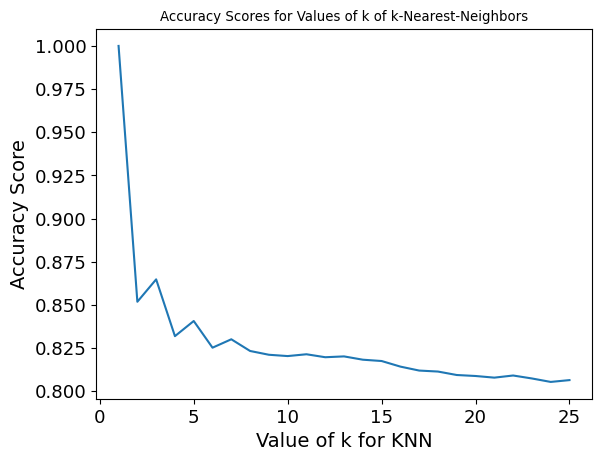

In [178]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()
     

In [179]:
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X)
print(metrics.accuracy_score(y, y_pred))


0.7651601830663616


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6292, 22)
(6292,)
(4196, 22)
(4196,)


C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

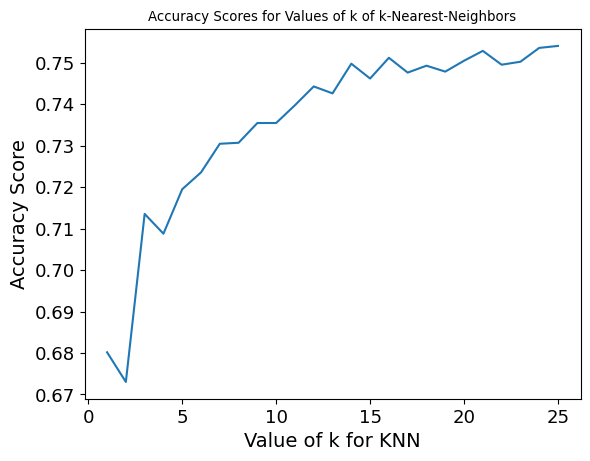

In [181]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [182]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.7490467111534795


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
